## Classifying two similar slope that has a very small difference

### Attempts in extracting stack functions through the very small difference in the decay pattern. Note: decaying slope should be around the same

## Classifying waveform which are similar yet have distinct difference that is sufficient for classification

There is a limitation of doing so, noise level is a particular concern.

[ 0.00548093]


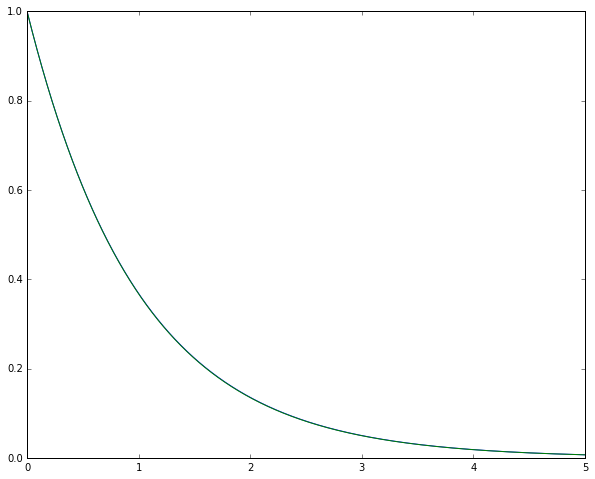

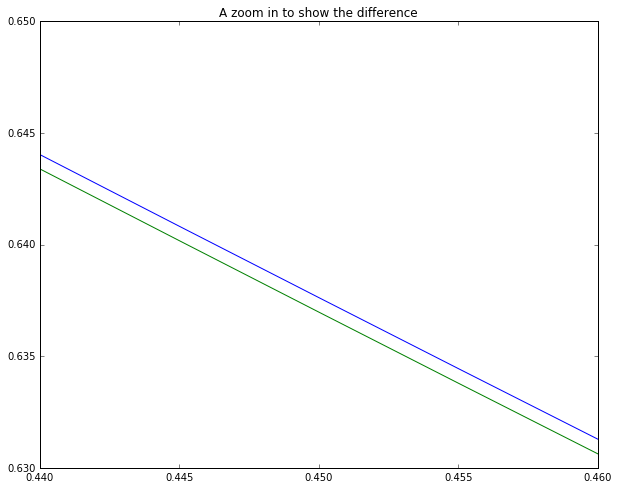

In [1]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10.0, 8.0)

Ratio = np.random.rand(2)
Ratio = Ratio/sum(Ratio)

x = np.arange(0,5,0.005)
y = np.exp(-x)

Shift = np.random.rand(1)/100
print(Shift)

# y1 = Ratio[0]*np.exp(-(x+Shift[0]*x))+Ratio[1]*np.exp(-(x+x*Shift[1]))+Ratio[2]*np.exp(-x)
y1 = Ratio[0]*np.exp(-(x+Shift[0]*x))+Ratio[1]*np.exp(-x)

plt.figure()
plt.plot(x,y)
plt.plot(x,y1)
plt.show()

plt.figure()
plt.title("A zoom in to show the difference")
plt.plot(x,y)
plt.plot(x,y1)
plt.xlim(0.44,0.46)
plt.ylim(0.63,0.65)
plt.show()

# adding noise

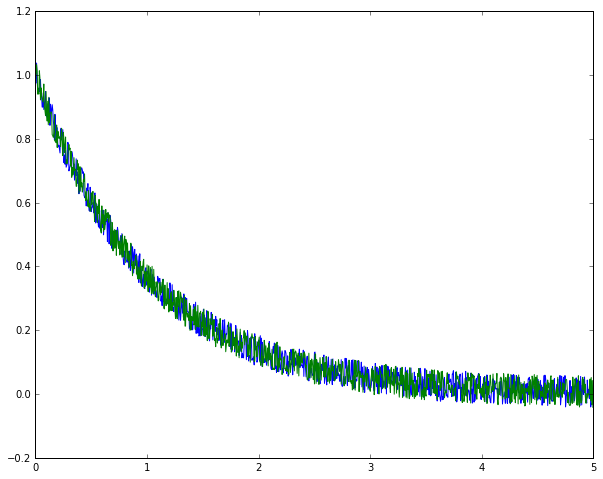

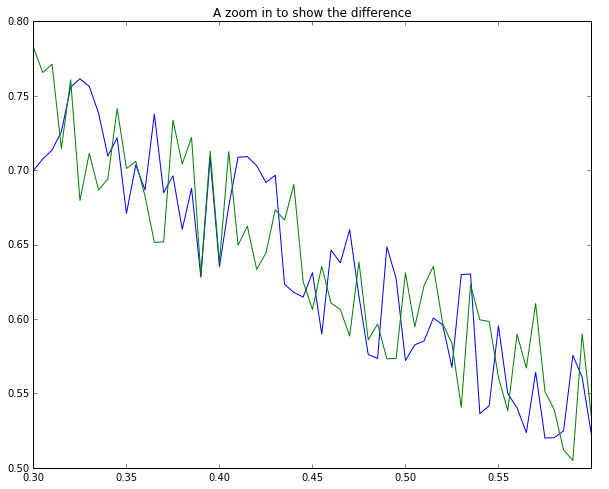

after subtracting a 'standard' function


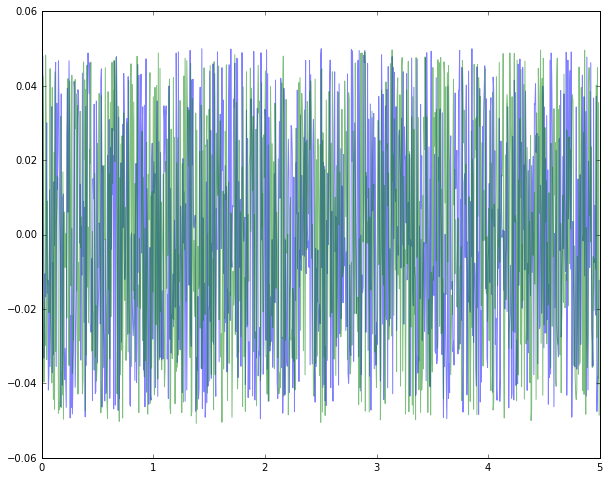

In [2]:
noise = 0.1

y_noise = (np.random.rand(len(x))*noise-noise/2.)+y
y1_noise = (np.random.rand(len(x))*noise-noise/2.)+y1

plt.figure()
plt.plot(x,y_noise)
plt.plot(x,y1_noise)
plt.show()

plt.figure()
plt.title("A zoom in to show the difference")
plt.plot(x,y_noise)
plt.plot(x,y1_noise)
plt.xlim(0.30,0.60)
plt.ylim(0.50,0.80)
plt.show()

d1 = y_noise - y
d2 = y1_noise - y

print("after subtracting a 'standard' function")

plt.figure()
plt.plot(x,d1,alpha=0.5)
plt.plot(x,d2,alpha=0.5)
plt.show()

# Generate data

(10000, 1000) (10000, 1000)


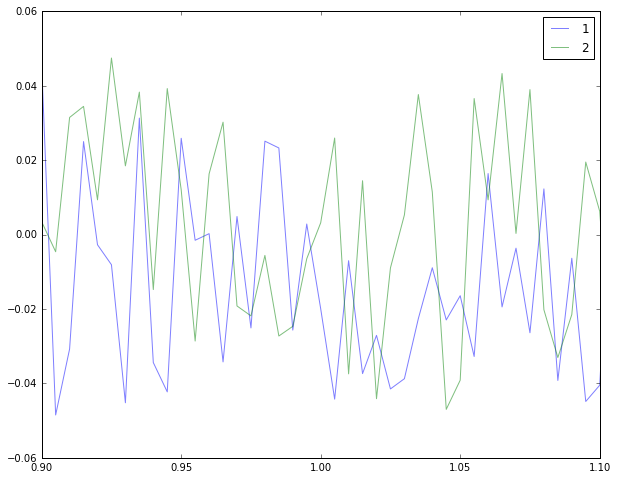

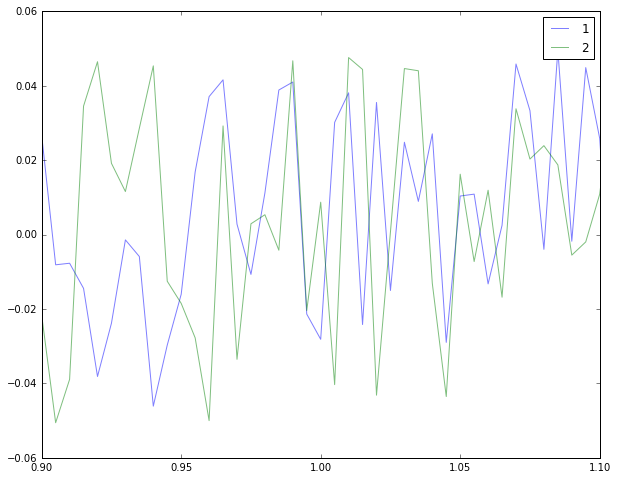

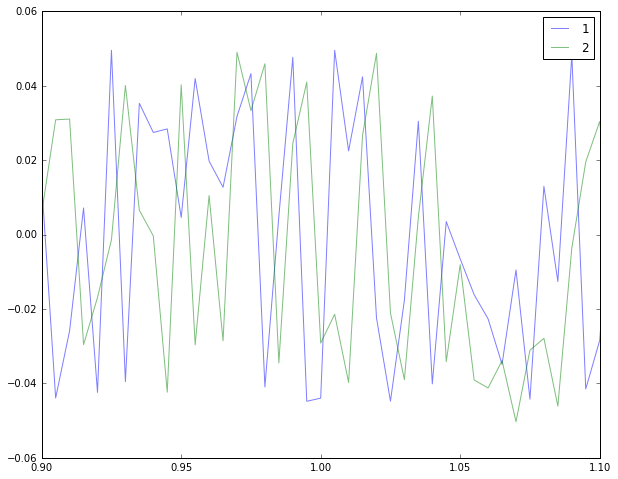

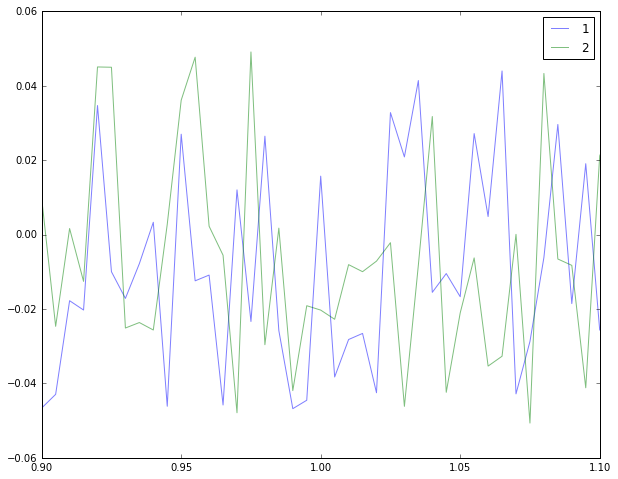

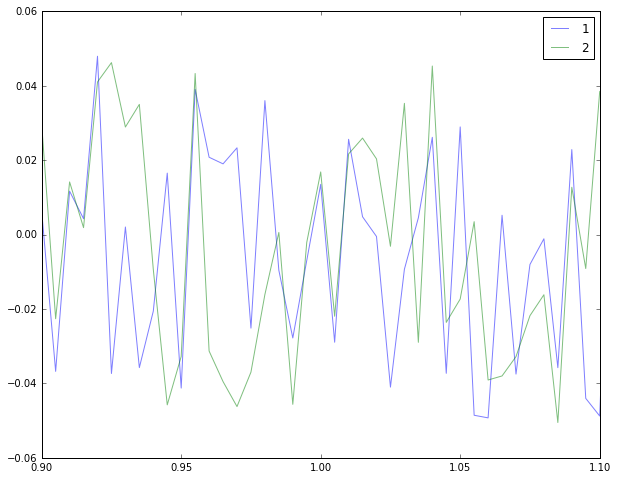

In [7]:
n = 10000
no_of_x = 1000

def x_generator(n):
	input_x = np.zeros((n,no_of_x))
	for i in range(n):
		input_x[i] = np.arange(0,5,0.005)
	return input_x

x_axis = x_generator(n)

def beta(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        yall[i] = np.exp(-x[i]) + (np.random.rand(no_of_x)*noise - noise/2.)
        yall[i] = yall[i] - np.exp(-x[i])
    return yall

# def gamma(x):
#     yall = np.zeros((n,no_of_x))
#     for i in range(n):
#         ratio = np.random.rand(3)
#         ratio = ratio/sum(ratio)
#         shift = np.random.rand(2)/100
#         yall[i] = ratio[0]*np.exp(-(x[i]+shift[0]*x[i])) + ratio[1]*np.exp(-(x[i]+shift[1]*x[i])) + ratio[2]*np.exp(-x[i])
#         yall[i] = yall[i] + (np.random.rand(no_of_x)*noise - noise/2.)
#         yall[i] = yall[i] - np.exp(-x[i])
#     return yall

def gamma(x):
    yall = np.zeros((n,no_of_x))
    for i in range(n):
        ratio = np.random.rand(2)
        ratio = ratio/sum(ratio)
        shift = np.random.rand(1)/100
        yall[i] = ratio[0]*np.exp(-(x[i]+shift[0]*x[i])) + ratio[1]*np.exp(-x[i])
        yall[i] = yall[i] + (np.random.rand(no_of_x)*noise - noise/2.)
        yall[i] = yall[i] - np.exp(-x[i])
    return yall

x1 = beta(x_axis)
x2 = gamma(x_axis)

print(x1.shape,x2.shape)

plt.figure()
plt.plot(x_axis[1],x1[1],label="1",alpha=0.5)
plt.plot(x_axis[1],x2[1],label="2",alpha=0.5)
# plt.xlim(0.9,1.1)
plt.legend()
plt.show()

plt.figure()
plt.plot(x_axis[2],x1[2],label="1",alpha=0.5)
plt.plot(x_axis[2],x2[2],label="2",alpha=0.5)
# plt.xlim(0.9,1.1)
plt.legend()
plt.show()

plt.figure()
plt.plot(x_axis[13],x1[13],label="1",alpha=0.5)
plt.plot(x_axis[13],x2[13],label="2",alpha=0.5)
# plt.xlim(0.9,1.1)
plt.legend()
plt.show()

plt.figure()
plt.plot(x_axis[3],x1[3],label="1",alpha=0.5)
plt.plot(x_axis[3],x2[3],label="2",alpha=0.5)
# plt.xlim(0.9,1.1)
plt.legend()
plt.show()

plt.figure()
plt.plot(x_axis[10],x1[10],label="1",alpha=0.5)
plt.plot(x_axis[10],x2[10],label="2",alpha=0.5)
# plt.xlim(0.9,1.1)
plt.legend()
plt.show()

Some method to augment the data into 2 dimensional space, Grammian matrix, Stochastic Matrix, Statsmodel.ARIMA

However all methods only leads to ~50% accuracy -> Fail to learning any structure.

### Grammian Matrix

1) rescale data from -1 to 1

2) Transform into Polar coordinate

3) Form grammian matrix with cos function

In [26]:
import math
def resecale_1to1(pmtall):
	x = pmtall
	w,h = x.shape
	print(w,h)
	y = np.zeros((w,h))
	x_max = np.amax(x, axis = 1)
	x_min = np.amin(x, axis = 1)
	for i in range(len(x)):
		for j in range(len(x[i])):
			y0 = (x[i][j])
			y1 = x_min[i]
			y2 = x_max[i]
			y[i][j] = ((y0-y2)+(y0 - y1))/(y2 - y1)
	return y


def polar(pmtall):
	x = pmtall
	w,h = x.shape
	print("polar!!")
	r = np.zeros((w,h))
	# phi = np.zeros((w,h))
	for i in range(len(x)):
		j = len(x[i])
		for k in range(len(x[i])):
			y = x[i][k]
			r[i][k] = math.acos(y)*2 - math.pi
			# phi[i][k] = k/j

	return r

def gram_matrix(pmtall):
	x = pmtall
	w,h = x.shape
	print("gramian!")
	y = np.zeros((w,h,h))
	for i in range(w):
		for j in range(h):
			for k in range(h):
				ele1 = x[i][j]
				ele2 = x[i][k]
				y[i][j][k] = math.sin(ele1+ele2)
		# plt.imshow(y[i], interpolation="nearest")
		# plt.show()

	return y
x1 = beta(x_axis)
x2 = gamma(x_axis)
# x1_1 = resecale_1to1(x1)
# x2_1 = resecale_1to1(x2)
# polar_coor_beta = polar(x1_1)
# polar_coor_gamma = polar(x2_1)
# gram_beta = gram_matrix(polar_coor_beta)
# gram_gamma = gram_matrix(polar_coor_gamma)


### Stochastic Matrix

A Markov Transition Matrix

In [ ]:
from sklearn.preprocessing import normalize

def stochastic(x):
	w,h = x.shape
	Matrix = np.zeros((w,h,h))
	for i in range(w):
		bins = np.arange(0, 1, 0.01)
		inds = np.digitize(x[i], bins, right=True)

		lags = np.zeros((2,len(inds)-1))
		for y in range(len(inds)-1):
			lags[0][y] = inds[y]
			lags[1][y] = inds[y+1]

		MTM = np.zeros((len(bins),len(bins)))
		for y in range(len(bins)):
			for z in range(len(bins)):

				dummy = 0
				for p in range(len(lags[0])):
					if lags[0][p] == y and lags[1][p] == z :
						dummy += 1
				MTM[y][z] = dummy
		MTM = normalize(MTM,norm="l1")
		MTM = np.flipud(MTM)
		Matrix[i] = MTM
	return Matrix


### ARIMA in python.statsmodels

Cannot find a definitive difference

In [ ]:
import statsmodels.api as sm

def sm_arima(x):
	yall = np.zeros((n,99))
	for i in range(len(x)):
		dummy = sm.tsa.ARIMA(x[i], order=(1,1,0))
		arima = dummy.fit(disp=0)
		# print(arima.arparams)
		# print(arima.pvalues)
		# print(arima.arfreq)
		# print(arima.aic)
		# print(arima.bic)
		# print(arima.bse)
		# print(arima.fittedvalues)
		for j in range(len(arima.fittedvalues)):
			yall[i][j] = arima.resid[j]
		# print("\n entry = ",i)
		# print(arima.summary())
		# print(arima.tvalues)
		# print(len(arima.resid))

		# yall[i][0] = np.array(arima.arparams)
		# yall[i][1] = arima.pvalues[0]
		# yall[i][2] = arima.pvalues[1]
		# yall[i][3] = arima.pvalues[2]		
		# yall[i][3] = arima.arfreq
		# yall[i][0] = arima.aic
		# yall[i][1] = arima.bic
		# yall[i][6] = arima.bse[0]
		# yall[i][7] = arima.bse[1]
		# yall[i][2] = arima.hqic
		# if i >20:
			# break
	return yall

sm_beta = sm_arima(x1)
sm_gamma = sm_arima(x2)

### A Clear demonstration of the failure to recognized which was expected.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 998, 4)            16        
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 996, 8)            104       
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 498, 8)            0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 498, 8)            0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 3984)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 16)                63760     
_________________________________________________________________
dropout_10 (Dropout)         (None, 16)                0         
__________

16000/16000 [==============================] - 3s - loss: 0.6622 - acc: 0.5892 - val_loss: 0.6684 - val_acc: 0.5980
Epoch 54/150
16000/16000 [==============================] - 3s - loss: 0.6600 - acc: 0.5930 - val_loss: 0.6675 - val_acc: 0.5950
Epoch 55/150
16000/16000 [==============================] - 3s - loss: 0.6576 - acc: 0.5919 - val_loss: 0.6636 - val_acc: 0.6083
Epoch 56/150
16000/16000 [==============================] - 3s - loss: 0.6589 - acc: 0.5969 - val_loss: 0.6640 - val_acc: 0.6023
Epoch 57/150
16000/16000 [==============================] - 3s - loss: 0.6601 - acc: 0.5926 - val_loss: 0.6650 - val_acc: 0.6051
Epoch 58/150
16000/16000 [==============================] - 3s - loss: 0.6590 - acc: 0.5974 - val_loss: 0.6654 - val_acc: 0.6083
Epoch 59/150
16000/16000 [==============================] - 3s - loss: 0.6584 - acc: 0.5958 - val_loss: 0.6659 - val_acc: 0.5838
Epoch 60/150
16000/16000 [==============================] - 4s - loss: 0.6590 - acc: 0.5970 - val_loss: 0.6660

16000/16000 [==============================] - 6s - loss: 0.6474 - acc: 0.6048 - val_loss: 0.6630 - val_acc: 0.6048
Epoch 116/150
16000/16000 [==============================] - 6s - loss: 0.6484 - acc: 0.6040 - val_loss: 0.6653 - val_acc: 0.6083
Epoch 117/150
16000/16000 [==============================] - 6s - loss: 0.6467 - acc: 0.6041 - val_loss: 0.6625 - val_acc: 0.6063
Epoch 118/150
16000/16000 [==============================] - 6s - loss: 0.6493 - acc: 0.6059 - val_loss: 0.6620 - val_acc: 0.6016
Epoch 119/150
16000/16000 [==============================] - 6s - loss: 0.6484 - acc: 0.6033 - val_loss: 0.6666 - val_acc: 0.6008
Epoch 120/150
16000/16000 [==============================] - 5s - loss: 0.6472 - acc: 0.6064 - val_loss: 0.6630 - val_acc: 0.5968
Epoch 121/150
16000/16000 [==============================] - 6s - loss: 0.6440 - acc: 0.6103 - val_loss: 0.6615 - val_acc: 0.6008
Epoch 122/150
16000/16000 [==============================] - 5s - loss: 0.6477 - acc: 0.6067 - val_loss:

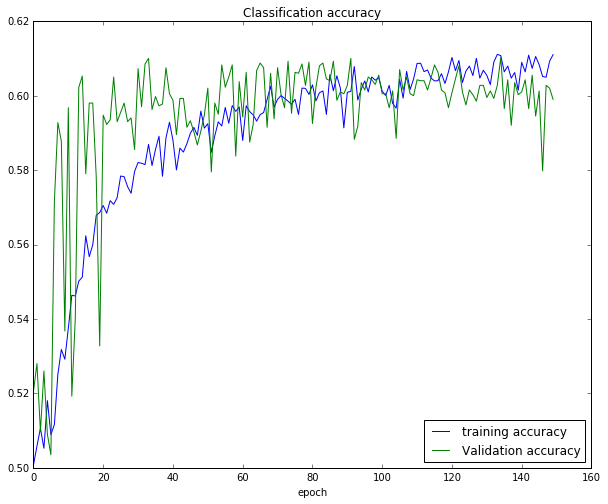

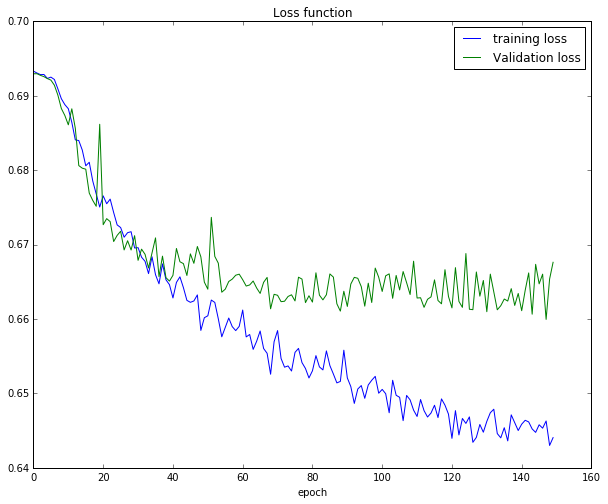

Classification accuracy = 0.599049522317


In [10]:
def separation(x,ratio):
	train = np.zeros((int(len(x)*ratio),no_of_x))
	test = np.zeros((int(len(x)*(1.-ratio)),no_of_x))
	for i in range(n):
		if i < (n*ratio):
			train[i] = x[i]
		if i >= (n*ratio):
			k = i - int(n*ratio) - 1
			test[k] = x[i]
	return train, test

train_beta, test_beta = separation(x1,0.8)
train_gamma, test_gamma  = separation(x2,0.8)

def labelling(x,num):
	label = np.zeros(len(x))
	for i in range(len(x)):
		label[i] = num
	return label

label_train_beta = labelling(train_beta,1)
label_train_gamma = labelling(train_gamma,0)
label_test_beta = labelling(test_beta,1)
label_test_gamma = labelling(test_gamma,0)

data_train = np.concatenate((train_beta,train_gamma), axis=0)
data_test = np.concatenate((test_beta,test_gamma), axis=0)
label_train = np.concatenate((label_train_beta,label_train_gamma),axis=0)
label_test = np.concatenate((label_test_beta,label_test_gamma),axis=0)

data_train = np.expand_dims(data_train,axis=2)
# data_train = np.expand_dims(data_train,axis=3)
data_test = np.expand_dims(data_test,axis=2)
# data_test = np.expand_dims(data_test,axis=3)

import keras

label_train = keras.utils.to_categorical(label_train, 2)
label_test = keras.utils.to_categorical(label_test, 2)

from keras.models import Model, Sequential, load_model
from keras.layers import Input, Dense, Activation, Conv1D, MaxPooling1D, Dropout, Flatten, LSTM, AveragePooling1D

from keras.regularizers import l2
from keras.optimizers import SGD

model = Sequential()
model.add(Conv1D(4, kernel_size=3, activation="relu", input_shape=(no_of_x,1)))
model.add(Conv1D(8, 3, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
# model.add(AveragePooling1D(pool_size=2))
# model.add(LSTM(10))

model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(16,activation="relu"))
model.add(Dropout(0.8))
model.add(Dense(2,activation="softmax"))
model.summary()
model.compile(loss = keras.losses.categorical_crossentropy, optimizer = keras.optimizers.Adadelta(), metrics=['accuracy'])
history = model.fit(data_train, label_train, batch_size=100, epochs=150, verbose=1, validation_data=(data_test,label_test))
score = model.evaluate(data_test, label_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure()
plt.title("Classification accuracy")
plt.xlabel("epoch")
plt.plot(history.history['acc'],label="training accuracy")
plt.plot(history.history['val_acc'],label="Validation accuracy")
plt.legend(loc=4)
plt.show()

plt.figure()
plt.title("Loss function")
plt.xlabel("epoch")
plt.plot(history.history['loss'],label="training loss")
plt.plot(history.history['val_loss'],label="Validation loss")
plt.legend()
plt.show()

print("Classification accuracy =",history.history['val_acc'][-1])

# Looking into methods of classifying small difference - Mission Impossible

I am still looking for ways to classiying noised functions with small difference as doing so can allows us to bring a new prespective to classifying physics data at the raw data level. Tradionally it is done through the reconstruction of physical parameters from raw data where "information" is lost in doing so. Attempt to simplify and speed the classification task of "signal" and "background".

## Possible Ideas, Wild concepts

This is a problem I feel worth researching and overcome as ML technique will then be much more superior to Pulse Shape Discriminator where traditional classification between gamma events and beta events are not clear due to the small difference/indentity both of it. In many way we can also translate this capablilty to other aspect that requires separation between not obvious difference where complicated techniques are required.

# How about subtract a reference from the both set of data? There is some hint where we can improve it from this direction. and while doing so, try with different noise level.

The balance has tips over the usual 50% accuracy(50% means learns nothing as it is just a game of probaility of distinguishing two outcomes). this was for no_of_x=100.

However for no_of_x=4000, different story, training show some progress but validation contradicts that.

# Determining what is the minimum ratio of noise to obtain the accuracy we want? How about doing the same as height function ipython notebook?

2 component to gamma function rather than 3 ? test it

# LSTM 

test it after getting gpu working, it is insanely slow!!!!!

# Training accuracy > Validation accuracy

Overfitting!!